# DataAnalyst CapStone Project - 'Identifying and Recommending Best Restaurants'

## - Preliminary Data Analysis

In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [411]:
restaurant_df = pd.read_csv(r"C:\Users\ImmanuelAdewumi\OneDrive - JCW Resourcing\Xander Talent\CapStone Project\1582800386_project1datadictionary\data.csv")

In [412]:
## DO NOT CHANGE
## TO DO: Skim through all the columns. There are a lot of columns that we don't need right now.
pd.options.display.max_rows = restaurant_df.shape[1]
restaurant_df.head(2).T

,0,1
Restaurant ID,7402935,7410290
Restaurant Name,Skye,Satoo - Hotel Shangri-La
Country Code,94,94
City,Jakarta,Jakarta
Address,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Hotel Shangri-La, Jl. Jend. Sudirman"
Locality,"Grand Indonesia Mall, Thamrin","Hotel Shangri-La, Sudirman"
Locality Verbose,"Grand Indonesia Mall, Thamrin, Jakarta","Hotel Shangri-La, Sudirman, Jakarta"
Longitude,106.821999,106.818961
Latitude,-6.196778,-6.203292
Cuisines,"Italian, Continental","Asian, Indonesian, Western"


#### Observations
- Columns which are Numerical or to be Converted to Numerical are;
1. Restaurant ID
2. Country Code
3. Longitude
4. Latitude
5. Average Cost for two
6. Price range
7. Aggregate rating
8. Votes

- Missing Values Occur for Nan/Null Values, but also for instances where these numerical Columns have values of 0

#### Conversion - Categorical Variables to Numerical

In [413]:
cat_to_num = ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

In [414]:
# For each Column Convert to Float

for col in cat_to_num:
    restaurant_df[col] = restaurant_df[col].astype(float)

#### Checking for Duplicates 

In [415]:
restaurant_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Length: 9551, dtype: bool

In [416]:
restaurant_df.shape

(9551, 19)

In [417]:
df = restaurant_df.drop_duplicates()

In [418]:
df.shape

(9551, 19)

A First double-check Shows us that there are No Duplicates to be Found

#### Checking for Missing (Na & Null) Values
- For Numeric DataTypes Missing Data shows up as Zeros or Nulls whereas it shows up as blanks for Categorical data.

In [419]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [421]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   float64
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   float64
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   float64
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   float64
 15  Aggregate rating     

- Both checking methods and results above show that the Column 'Cuisines' has the highers number of Null (Missing) values, with 9 missing values.
- We Remove the rows with these missing Values below and do a second check.

### Checking for Zeros 

In [423]:
for col in cat_to_num:
    counter = 0
    total_counter = 0
    for x in df[col]:
        total_counter += 1
        if x == 0.0:
            counter += 1
    print(col + '\'s Zeros Count is ' + str(counter))

print('Total number of Rows is ' + str(total_counter))
        
    #df[col] = df[col].astype(float)

Restaurant ID's Zeros Count is 0
Country Code's Zeros Count is 0
Longitude's Zeros Count is 498
Latitude's Zeros Count is 498
Average Cost for two's Zeros Count is 18
Price range's Zeros Count is 0
Aggregate rating's Zeros Count is 2148
Votes's Zeros Count is 1094
Total number of Rows is 9551


These results show that;
- Longitude/Latitude Measurements have 498 missing values
- 'Average Cost for two' Measurements might likely have 18 missing values, unless missing restaurants provide food
- Aggregate rating Measurements are to be between 1-5 so the 2148 measurements of Zero show instances of No Ratings or Missing Values
- 1094 Resaurants either received Zero votes or have 1094 missing records

## Performing EDA - Part 1

### Restaurants per City

In [424]:
#Counting the Number of Cities


cities = []
for x in df['City']:
    if x not in cities:
        cities.append(x)
        
print('Number of Cities are ' +str(len(cities)))
print('List of Cities are '+str(cities))

Number of Cities are 141
List of Cities are ['Jakarta', 'Tangerang', 'Bogor', 'Bandung', 'New Delhi', 'Pasay City', 'Gurgaon', 'Colombo', 'Mandaluyong City', 'Agra', 'Noida', 'Pretoria', 'Taguig City', 'Kanpur', 'Ghaziabad', 'Jaipur', 'Bangalore', 'Chandigarh', 'Pune', 'Chennai', 'Goa', 'Hyderabad', 'Indore', 'Lucknow', 'Ludhiana', 'Panchkula', 'Ranchi', 'Faridabad', 'Kolkata', 'Ahmedabad', 'Aurangabad', 'Bhopal', 'Mysore', 'Vizag', 'Guwahati', 'Dehradun', 'Mangalore', 'Nagpur', 'Patna', 'Inner City', 'Bhubaneshwar', 'Coimbatore', 'Kochi', 'Mumbai', 'Nashik', 'Puducherry', 'Surat', 'Vadodara', 'Makati City', 'Tagaytay City', 'Amritsar', 'Pasig City', 'Varanasi', 'San Juan City', 'Allahabad', 'Johannesburg', 'Santa Rosa', 'Secunderabad', 'Quezon City', 'Cape Town', 'Mohali', 'Doha', 'Sandton', 'Singapore', 'Abu Dhabi', 'Dubai', 'SÌ£o Paulo', 'Ankara', 'BrasÌ_lia', 'Rio de Janeiro', 'Sharjah', 'London', 'Wellington City', 'Randburg', 'Auckland', '€¡stanbul', 'Manchester', 'Paynesville', 

In [425]:
city_restaurant_no = []
restaurant_freq = []

Overall_Total_Restaurants = 0   #This is to Check that it all adds to 9551

for x in cities:
    total = len(df[df.City == x])
    #print('Total for '+ x + ' is '+str(total))
    city_restaurant_no.append([x,total])
    restaurant_freq.append(total)
    Overall_Total_Restaurants += total

In [426]:
print('Total number of Restaurants Checks-out as ' + str(Overall_Total_Records))
#print(city_restaurant_no)


Total number of Restaurants Checks-out as 0


#### Finding Minimum and Maximum number of Restaurants in a City

In [625]:
# Minimum
print('One of the Cities with fewest Resaurants is '+str(cities[restaurant_freq.index(min(restaurant_freq))]) + ' with ' + str(min(restaurant_freq))+' restaurant.')

# Maximum 
print('City with the Most Resaurants is '+str(cities[restaurant_freq.index(max(restaurant_freq))])+ ' with ' + str(max(restaurant_freq))+' restaurants.')


City with fewest Resaurants is Bandung with 1 restaurant.
City with the Most Resaurants is New Delhi with 5473 restaurants.


### Plotting Frequency of Restaurants Vs. City
#### - Brute Fource Method -

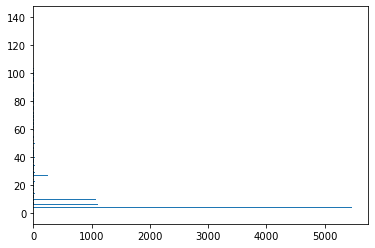

In [626]:
x = cities
y = restaurant_freq

#plt.bar(range(len(x)), y, width=0.8, bottom=None)  # Here each X-axis number index represents one of the 141 Cities in the 'cities' list
plt.barh(range(len(x)), y)
plt.show()

### Plotting Count of Restaurants by Country
#### - Efficient DataFrame Method -

<AxesSubplot:ylabel='Country Code,Country'>

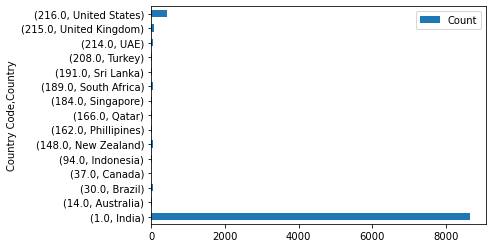

In [770]:
cc = pd.read_excel('C:/Users/ImmanuelAdewumi/OneDrive - JCW Resourcing/Xander Talent/CapStone Project/1582800386_project1datadictionary/Country-Code.xlsx')
data = df.copy(deep=True)
df = pd.merge(data,cc,on='Country Code',how='left')
country_dist = df.groupby(['Country Code','Country']).agg(Count = ('Restaurant ID','count'))
country_dist.sort_values(by='Count',ascending=False)
country_dist.plot(kind='barh', )

## Counting Numbers of Franchises

#### - Just Below is The Brute Force Method
       - This Method takes a Few Minutes to Run and Show Results
       - It was not very efficient, but was an Interesting Approach to Solving the Problem

In [429]:
#Counting the Number of Franchises


franchises = []
for x in df['Restaurant Name']:
    if x not in franchises:
        franchises.append(x)
        
print('Number of Franchises are ' +str(len(franchises)))
#print('List of Franchises are '+str(franchises))

Number of Franchises are 7446


In [440]:
countrycodes = [1, 14, 30, 37, 94, 148, 162, 166, 184, 189, 191, 208, 214, 215, 216]   # a.k.a - cc
country_and_franchise_dict = {1:[], 14:[], 30:[], 37:[], 94:[], 148:[], 162:[], 166:[], 184:[], 189:[], 191:[], 208:[], 214:[], 215:[], 216:[]}
countries = {1:'India', 14:'Australia', 30:'Brazil', 37:'Canada', 94:'Indonesia', 148:'New Zealand', 162:'Phillipines', 166:'Qatar', 184:'Singapore', 189:'South Africa', 191:'Sri-Lanka', 208:'Turkey', 214:'UAE', 215:'United States', 216:'United Kingdom'}

#print(franchises)   

#x = franchises[1]

for x in franchises:
    for cc in countrycodes:
        # fcc represent franchise count in country
        fcc = df.loc[np.where((df['Restaurant Name']==x) & (df['Country Code'] == float(cc)))].shape[0]
        #print(df.loc[np.where((df['Restaurant Name']==x) & (df['Country Code'] == float(cc)))])
        country_and_franchise_dict[cc].append([x,fcc])
        if fcc > 0:
            #print('Number of '+ x + ' restaurants in ' + str(countries[cc]) + ' is '+str(fcc))
            q = country_and_franchise_dict[cc].index([x,fcc])
            #print([cc,country_and_franchise_dict[cc][q]])
   

countries_franchise_freq = {1:[[]], 14:[[]], 30:[[]], 37:[[]], 94:[[]], 148:[[]], 162:[[]], 166:[[]], 184:[[]], 189:[[]], 191:[[]], 208:[[]], 214:[[]], 215:[[]], 216:[[]]}

most_popularfranchise_in_country = {1:[[]], 14:[[]], 30:[[]], 37:[[]], 94:[[]], 148:[[]], 162:[[]], 166:[[]], 184:[[]], 189:[[]], 191:[[]], 208:[[]], 214:[[]], 215:[[]], 216:[[]]}


for cc in countrycodes:  
    countries_franchise_freq[cc][0] = [x[0] for x in country_and_franchise_dict[cc]]
    countries_franchise_freq[cc].append([x[1] for x in country_and_franchise_dict[cc]])
    Max = max(countries_franchise_freq[cc][1])
    print(Max)
    MaxFranchiseIndx = countries_franchise_freq[cc][1].index(max(countries_franchise_freq[cc][1]))
    most_popularfranchise_in_country[cc][0] = countries_franchise_freq[cc][0][MaxFranchiseIndx]
    most_popularfranchise_in_country[cc].append(Max)
    print('Most Popular franchise in ' + countries[cc] + ' is ' + countries_franchise_freq[cc][0][MaxFranchiseIndx] + ' with ' + str(Max) + ' franchise(s).')
    
#print(most_popularfranchise_in_country)



83
Most Popular franchise in India is Cafe Coffee Day with 83 franchise(s).
1
Most Popular franchise in Australia is Pier 70 with 1 franchise(s).
2
Most Popular franchise in Brazil is Coco Bambu with 2 franchise(s).
1
Most Popular franchise in Canada is Lake House Restaurant with 1 franchise(s).
3
Most Popular franchise in Indonesia is Talaga Sampireun with 3 franchise(s).
1
Most Popular franchise in New Zealand is Hippopotamus - Museum Hotel with 1 franchise(s).
2
Most Popular franchise in Phillipines is Silantro Fil-Mex with 2 franchise(s).
1
Most Popular franchise in Qatar is Punjab Restaurant with 1 franchise(s).
1
Most Popular franchise in Singapore is Restaurant Andre with 1 franchise(s).
1
Most Popular franchise in South Africa is Restaurant Mosaic @ The Orient with 1 franchise(s).
1
Most Popular franchise in Sri-Lanka is The Manhattan Fish Market with 1 franchise(s).
2
Most Popular franchise in Turkey is Timboo Cafe with 2 franchise(s).
3
Most Popular franchise in UAE is Appleb

In [441]:

list1 = [x for x in [most_popularfranchise_in_country[cc] for cc in countrycodes]]
freqlist = ([x[1] for x in [most_popularfranchise_in_country[cc] for cc in countrycodes]])
franchlist = ([x[0] for x in [most_popularfranchise_in_country[cc] for cc in countrycodes]])
print(list1)
print(freqlist)
print(franchlist)
Greatest_freq = max(freqlist)
Franchise_greatest_freq = [x[0] for x in [most_popularfranchise_in_country[cc] for cc in countrycodes]][[x[1] for x in [most_popularfranchise_in_country[cc] for cc in countrycodes]].index(max([x[1] for x in [most_popularfranchise_in_country[cc] for cc in countrycodes]]))]
print(list1.index([Franchise_greatest_freq, Greatest_freq]))
Nation = list(countries.items())[list1.index([Franchise_greatest_freq, Greatest_freq])][1]

print('Franchise with Greatest National Presence is ' + str(Franchise_greatest_freq) + ' with ' + str(Greatest_freq) + ' franchise(s) in '+ Nation + '.')
    
print('End')  

[['Cafe Coffee Day', 83], ['Pier 70', 1], ['Coco Bambu', 2], ['Lake House Restaurant', 1], ['Talaga Sampireun', 3], ['Hippopotamus - Museum Hotel', 1], ['Silantro Fil-Mex', 2], ['Punjab Restaurant', 1], ['Restaurant Andre', 1], ['Restaurant Mosaic @ The Orient', 1], ['The Manhattan Fish Market', 1], ['Timboo Cafe', 2], ["Applebee's", 3], ["Jamie's Italian", 3], ['Texas Roadhouse', 4]]
[83, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 2, 3, 3, 4]
['Cafe Coffee Day', 'Pier 70', 'Coco Bambu', 'Lake House Restaurant', 'Talaga Sampireun', 'Hippopotamus - Museum Hotel', 'Silantro Fil-Mex', 'Punjab Restaurant', 'Restaurant Andre', 'Restaurant Mosaic @ The Orient', 'The Manhattan Fish Market', 'Timboo Cafe', "Applebee's", "Jamie's Italian", 'Texas Roadhouse']
0
Franchise with Greatest National Presence is Cafe Coffee Day with 83 franchise(s) in India.
End


#### Efficient Method for Counting Franchises

In [747]:
max_rate = pd.DataFrame(rating_df.groupby(by=['Restaurant Name','Country Code']).size().sort_values(ascending=False).reset_index(name='Count'))
#find the highest restuarant in the city
#max_rate
#del max_rate['variable']
max_rate.columns=['Restaurant Name','Country Code','Count']
max_rate.head(10000)

,Restaurant Name,Country Code,Count
0,Cafe Coffee Day,1.0,83
1,Domino's Pizza,1.0,79
2,Subway,1.0,63
3,Green Chick Chop,1.0,51
4,McDonald's,1.0,48
...,...,...,...
7468,Giapo,148.0,1
7469,Giani's di Hatti,1.0,1
7470,Gian Ji Punjabi Dhaba,1.0,1
7471,Ghungroo Club & Bar - By Gautam Gambhir,1.0,1


Cafe Coffee Day has the Most franchises with a Count of 83 
  - This is the Same value as with the previous Brute-force Method. So the method worked.

#### Ratio of Restaurants with Table Booking

In [442]:
w_table_booking = df.loc[np.where(df['Has Table booking'] == 'Yes')].shape[0]
print('Number with Table booking = ' + str(w_table_booking))
wvout_table_booking = df.loc[np.where(df['Has Table booking'] == 'No')].shape[0]
print('Number without Table booking = ' + str(wvout_table_booking))
Ratio = w_table_booking/wvout_table_booking
print('Ratio of number of Restaurants with Table booking to number without = ' + str(Ratio))

Number with Table booking = 1158
Number without Table booking = 8393
Ratio of number of Restaurants with Table booking to number without = 0.13797211962349576


Sanity Check 
- Test that the Sum of with and without Table Booking Equals the Previous Recorded value of Total Restaurants 9511

In [443]:
print('Sum of with and without equals '+ str(w_table_booking + wvout_table_booking))
print('Previous Total was ' + str(Overall_Total_Restaurants))
print('Sanity Check Passed - both numbers the same.')

Sum of with and without equals 9551
Previous Total was 9551
Sanity Check Passed - both numbers the same.


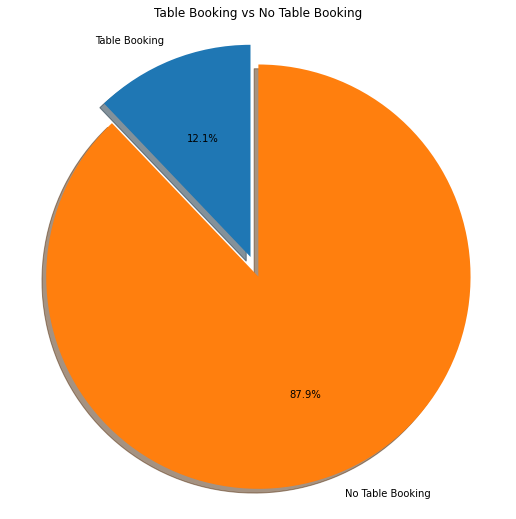

In [749]:
#Pie chart to show percentage of restaurants which allow table booking and those which do not
labels = 'Table Booking', 'No Table Booking'
sizes = [w_table_booking,wvout_table_booking]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.set_title("Table Booking vs No Table Booking")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Percentage with Online Delivery

In [757]:
w_online_delivery = df.loc[np.where(df['Has Online delivery'] == 'Yes')].shape[0]
wvout_online_delivery = df.loc[np.where(df['Has Online delivery'] == 'No')].shape[0]
print('Sanity Check Passed: ', wvout_online_delivery == Overall_Total_Restaurants - w_online_delivery)           # Sanity Check
print('Number with Online delivery = ' + str(w_online_delivery))
print('Percentage = (100 * Number with Online Delivery/Total No. Restaurants) = ' + str(round((100 * w_online_delivery/Overall_Total_Restaurants),2)) + '%.')

Sanity Check Passed:  True
Number with Online delivery = 2451
Percentage = (100 * Number with Online Delivery/Total No. Restaurants) = 25.66%.


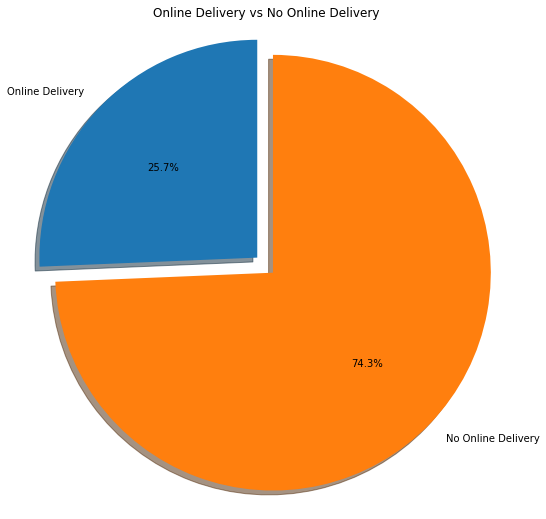

In [758]:
#pie chart to show percentages of restaurants allowing online delivery vs those which do not have online delivery
labels = 'Online Delivery','No Online Delivery'
size = [w_online_delivery,wvout_online_delivery]
explode = (0.1,0)
fig1,ax1 = plt.subplots(figsize=(9,9))
ax1.pie(size,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.set_title("Online Delivery vs No Online Delivery")
ax1.axis('equal')
plt.show()

#### Difference in Votes for Restaurants that Deliver and Don't

In [540]:
votes_for_delivering = sum(df.loc[np.where(df['Has Online delivery'] == 'Yes')]['Votes'])
print('Votes for Restaurants that Deliver: '+ str(votes_for_delivering))
votes_for_non_delivering = sum(df.loc[np.where(df['Has Online delivery'] == 'No')]['Votes'])
print('Votes for Restaurants that Do Not Deliver: '+ str(votes_for_non_delivering))
sumtotal_votes = sum(df['Votes'])
print('Sanity Check - SumTotal Overall Number of Votes from the table Should Equal the Sum of Both Previous Components')
print('SumTotal = ' + str(sumtotal_votes))
print('Summation of Previous 2 components ' + 'Votes for Restaurants that Deliver:'+str(votes_for_delivering) +' + Votes for Restaurants that Do Not Deliver:'+str(votes_for_non_delivering)+' = '+str(votes_for_delivering+votes_for_non_delivering))
print('Numbers are the Same - Sanity Check Passed')

Votes for Restaurants that Deliver: 517914.0
Votes for Restaurants that Do Not Deliver: 980731.0
Sanity Check - SumTotal Overall Number of Votes from the table Should Equal the Sum of Both Previous Components
SumTotal = 1498645.0
Summation of Previous 2 components Votes for Restaurants that Deliver:517914.0 + Votes for Restaurants that Do Not Deliver:980731.0 = 1498645.0
Numbers are the Same - Sanity Check Passed


Calculaing the Difference :

In [541]:
print('Difference = ' + 'Votes for Restaurants that Deliver:'+str(votes_for_delivering) +' - Votes for Restaurants that Do Not Deliver:'+str(votes_for_non_delivering)+' = '+str(votes_for_delivering-votes_for_non_delivering))
print('Difference is '+ str(votes_for_delivering-votes_for_non_delivering))
print('A Negative Difference indicates that Non-delivering Restaurants are Preferred.')

Difference = Votes for Restaurants that Deliver:517914.0 - Votes for Restaurants that Do Not Deliver:980731.0 = -462817.0
Difference is -462817.0
A Negative Difference indicates that Non-delivering Restaurants are Preferred.


# Performing EDA - Part 2

### Ranking Cuisines 

Below Is the List of the 10 Most Popular Cuisines Across Cities 

In [695]:

df.Cuisines.str.split(', ', expand=True).stack().value_counts().head(10)


North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
dtype: int64

In [583]:
Cuisine_list = df['Cuisines'].values.tolist()
Total_Cuisines_List = []

for x in Cuisine_list:
    x = [str(x).split(',')]
    Total_Cuisines_List = Total_Cuisines_List + x

food_list = Total_Cuisines_List  
#print(Total_Cuisines_List)

cuisine_freq = [len(x) for x in Total_Cuisines_List ]
#print(cuisine_freq)

MaxC = max(cuisine_freq)
MinC = min(cuisine_freq)
maxindx = cuisine_freq.index(MaxC)
minindx = cuisine_freq.index(MinC)

print('Maximum Number of Cuisines Served by a Restaurant is '+str(MaxC)+ ' served by '+ str(df['Restaurant Name'][maxindx]))
print('Minimum Number of Cuisines Served by a Restaurant is '+str(MinC)+ ' served by '+ str(df['Restaurant Name'][minindx])+' and many other restaurants.')

Maximum Number of Cuisines Served by a Restaurant is 8 served by R' ADDA
Minimum Number of Cuisines Served by a Restaurant is 1 served by 3 Wise Monkeys and many other restaurants.


#### Most Served Cuisine Across Restaurants of Each City

In [687]:
most_pop_cuisine_list = []

for cc in cities:
        # fcc represent franchise count in country
        fcc = df.loc[np.where((df['City']==cc))]
        most_freq = fcc.Cuisines.str.split(', ', expand=True).stack().value_counts()[:1]
        #most_freq = pd.Series(np.concatenate([x.split(',') for x in fcc.Cuisines])).value_counts()[:1]
        #most_freq = pd.Series(' '.join(fcc.Cuisines).split()).value_counts()[:1]
        #most_freq = [most_freq]
        most_freq = str(most_freq).split(' ')[0]
        most_pop_cuisine_list = most_pop_cuisine_list + [str(most_freq)]
        
#print(most_pop_cuisine_list)
#print('len list '+str(len(most_pop_cuisine_list)))

In [699]:
cuisine_df = pd.DataFrame(list(zip(cities, most_pop_cuisine_list)),
               columns =['City', 'Most Popular Cuisine'])

cuisine_df.head(10)

,City,Most Popular Cuisine
0,Jakarta,Western
1,Tangerang,Indonesian
2,Bogor,Peranakan
3,Bandung,Cafe
4,New Delhi,North
5,Pasay City,European
6,Gurgaon,North
7,Colombo,American
8,Mandaluyong City,Japanese
9,Agra,North


Above is a DataFrame which Details the Most Served Cuisine Across all Restaurants for Each City

In [684]:
currencies = []
distribution_costs = []

for cc in cities:
        # acc represent average_cost_and_currency
        acc = df.loc[np.where((df['City']==cc))]
        sum_costs = acc['Average Cost for two'].sum()
        currency = acc['Currency'].drop_duplicates()
        #print(currency)
        #print(sum_costs)
        currency = str(currency).split('\n')
        #currency = currency[0].replace(' ', '')
        currency = currency[0].split('  ')[2]
        #print(currency)
        currencies = currencies + [currency]
        distribution_costs = distribution_costs + [sum_costs]
        
#print(currencies)
#print(distribution_costs)
#print('len list currencies '+str(len(currencies)))
#print('len list distribution cost '+str(len(distribution_costs)))

costpercity_df = pd.DataFrame(list(zip(cities, distribution_costs, currencies)),
               columns =['City', 'Distribution Cost Across City', 'Currency'])

costpercity_df.head()

,City,Distribution Cost Across City,Currency
0,Jakarta,4935000.0,Indonesian Rupiah(IDR)
1,Tangerang,500000.0,Indonesian Rupiah(IDR)
2,Bogor,320000.0,Indonesian Rupiah(IDR)
3,Bandung,150000.0,Indonesian Rupiah(IDR)
4,New Delhi,3262390.0,Indian Rupees(Rs.)


In [698]:
dcascr = []   # this represents distribution_costs_across_shared_currency_region
distinct_currencies = []

for x in currencies:
    if x not in distinct_currencies:
        distinct_currencies.append(x)

for cur in distinct_currencies:
        # cc represent currency cummulated
        cc = costpercity_df.loc[np.where((costpercity_df['Currency']==cur))]
        sum_costs = cc['Distribution Cost Across City'].sum()
        currency = cc['Currency'].drop_duplicates()
        #print(currency)
        dcascr = dcascr + [sum_costs]

#print(distinct_currencies)
#print(dcascr)
#print('len list distinct currencies '+str(len(distinct_currencies)))
#print('len list distribution cost across shared currency regions '+str(len(dcascr)))


dcascr_df = pd.DataFrame(list(zip(dcascr, distinct_currencies)),
               columns =['Distribution Cost Per Shared Currency Region', 'Currency'])

dcascr_df.head(12)  # Only Show 12 rows as there are Only 12 Currencies 



,Distribution Cost Per Shared Currency Region,Currency
0,5905000.0,Indonesian Rupiah(IDR)
1,5393400.0,Indian Rupees(Rs.)
2,35350.0,Botswana Pula(P)
3,47500.0,Sri Lankan Rupee(LKR)
4,25184.0,Rand(R)
5,4475.0,Qatari Rial(QR)
6,15188.0,Dollar($)
7,9985.0,Emirati Diram(AED)
8,8080.0,Brazilian Real(R$)
9,2885.0,Turkish Lira(TL)


### How Varios Factors Might Affect Rating?

In [713]:
rating_df = df[['Restaurant ID','Restaurant Name','Country Code','City','Aggregate rating','Average Cost for two','Votes','Price range','Has Table booking','Has Online delivery','Cuisines']].copy(deep=True)

bi_cols = []
for col in rating_df.columns:
    if rating_df[col].nunique() == 2:
        bi_cols.append(col)
        
print(bi_cols)

"""
hex_cols = []
for col in rating_df.columns:
    if rating_df[col].nunique() == 5:
        hex_cols.append(col)
"""

for col in bi_cols:
    rating_df[col] = rating_df[col].map({'No': 0, 'Yes': 1})

rating_df[bi_cols].head(10)

['Has Table booking', 'Has Online delivery']


,Has Table booking,Has Online delivery
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [714]:
rating_df

,Restaurant ID,Restaurant Name,Country Code,City,Aggregate rating,Average Cost for two,Votes,Price range,Has Table booking,Has Online delivery,Cuisines
0,7402935.0,Skye,94.0,Jakarta,4.1,800000.0,1498.0,3.0,0,0,"Italian, Continental"
1,7410290.0,Satoo - Hotel Shangri-La,94.0,Jakarta,4.6,800000.0,873.0,3.0,0,0,"Asian, Indonesian, Western"
2,7420899.0,Sushi Masa,94.0,Jakarta,4.9,500000.0,605.0,3.0,0,0,"Sushi, Japanese"
3,7421967.0,3 Wise Monkeys,94.0,Jakarta,4.2,450000.0,395.0,3.0,0,0,Japanese
4,7422489.0,Avec Moi Restaurant and Bar,94.0,Jakarta,4.3,350000.0,243.0,3.0,0,0,"French, Western"
...,...,...,...,...,...,...,...,...,...,...,...
9546,18279289.0,BMG - All Day Dining,1.0,Dehradun,4.3,0.0,63.0,1.0,0,0,"Chinese, North Indian, Fast Food"
9547,2300497.0,Atmosphere Grill Cafe Sheesha,1.0,Kanpur,3.6,0.0,34.0,1.0,0,0,"Indian, Chinese, Continental"
9548,18312106.0,UrbanCrave,1.0,Kanpur,3.9,0.0,127.0,1.0,0,0,"Cafe, Continental, Desserts, Ice Cream, Italia..."
9549,3900245.0,Deena Chat Bhandar,1.0,Varanasi,3.8,0.0,78.0,1.0,0,0,Street Food


In [733]:
rs_df = rating_df.merge(max_rate,left_on='Restaurant Name',right_on='Restaurant Name',how='left')     # rs_df represents rating_scale_dataframe

rs_df

,Restaurant ID,Restaurant Name,Country Code_x,City,Aggregate rating,Average Cost for two,Votes,Price range,Has Table booking,Has Online delivery,Cuisines,Country Code_y,Count
0,7402935.0,Skye,94.0,Jakarta,4.1,800000.0,1498.0,3.0,0,0,"Italian, Continental",94.0,1
1,7410290.0,Satoo - Hotel Shangri-La,94.0,Jakarta,4.6,800000.0,873.0,3.0,0,0,"Asian, Indonesian, Western",94.0,1
2,7420899.0,Sushi Masa,94.0,Jakarta,4.9,500000.0,605.0,3.0,0,0,"Sushi, Japanese",94.0,1
3,7421967.0,3 Wise Monkeys,94.0,Jakarta,4.2,450000.0,395.0,3.0,0,0,Japanese,94.0,1
4,7422489.0,Avec Moi Restaurant and Bar,94.0,Jakarta,4.3,350000.0,243.0,3.0,0,0,"French, Western",94.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9694,18279289.0,BMG - All Day Dining,1.0,Dehradun,4.3,0.0,63.0,1.0,0,0,"Chinese, North Indian, Fast Food",1.0,1
9695,2300497.0,Atmosphere Grill Cafe Sheesha,1.0,Kanpur,3.6,0.0,34.0,1.0,0,0,"Indian, Chinese, Continental",1.0,1
9696,18312106.0,UrbanCrave,1.0,Kanpur,3.9,0.0,127.0,1.0,0,0,"Cafe, Continental, Desserts, Ice Cream, Italia...",1.0,1
9697,3900245.0,Deena Chat Bhandar,1.0,Varanasi,3.8,0.0,78.0,1.0,0,0,Street Food,1.0,1


,Count,Aggregate rating
Count,1.000000,0.016339
Aggregate rating,0.016339,1.000000


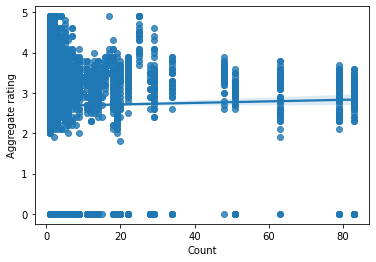

In [736]:
sns.regplot(x='Count',y='Aggregate rating',data = rs_df)
rs_df[["Count", "Aggregate rating"]].corr()
#Number of cuisines is not a good factor to decide the rating of a restaurant

,Average Cost for two,Aggregate rating
Average Cost for two,1.000000,0.051211
Aggregate rating,0.051211,1.000000


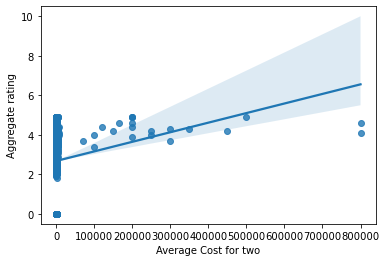

In [738]:
sns.regplot(x='Average Cost for two',y='Aggregate rating',data=rs_df)
rs_df[['Average Cost for two', 'Aggregate rating']].corr()
#Average cost for two is a weak positive factor to decide the rating of a restaurant

,Votes,Aggregate rating
Votes,1.000000,0.316106
Aggregate rating,0.316106,1.000000


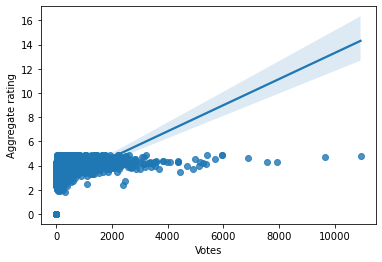

In [740]:
sns.regplot(x='Votes',y='Aggregate rating',data=rs_df)
rs_df[['Votes','Aggregate rating']].corr()
##Average cost for two can be a factor to decide the rating of a restaurant

,Price range,Aggregate rating
Price range,1.0000,0.4435
Aggregate rating,0.4435,1.0000


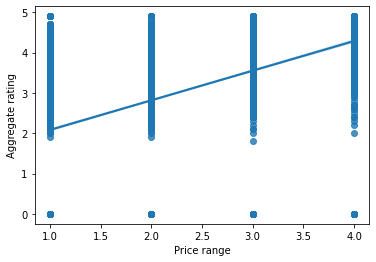

In [744]:
sns.regplot(x='Price range',y='Aggregate rating',data=rs_df)
rs_df[['Price range','Aggregate rating']].corr()
##Price range can be a factor to decide the rating of a restaurant

,Has Table booking,Aggregate rating
Has Table booking,1.000000,0.188497
Aggregate rating,0.188497,1.000000


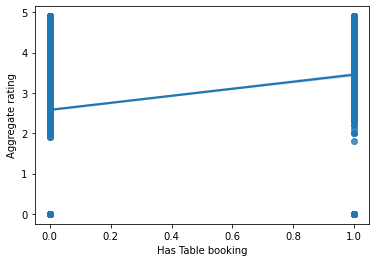

In [746]:
sns.regplot(x='Has Table booking',y='Aggregate rating',data=rs_df)
rs_df[['Has Table booking','Aggregate rating']].corr()
##Table booking can be a factor to decide the rating of a restaurant

No Single Factor affects the Ratings Strongly as they all have fairly low Correlation  Factors. However, each factor; Restaurant Count, Cost, Price range, and availability of Table Bookings all do have slight positive correlations (potentially effect) on Restaurant Rating.